In [1]:
import warnings
warnings.filterwarnings('ignore')
from autoencoders import *
from pdb_utils import *
import pickle
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
import seaborn as sns; sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt

In [3]:
with open('pickle files/label_dict.pkl', 'rb') as f:
    label_dict = pickle.load(f)

In [4]:
with open('pickle files/ProteinContactMapDict.pkl', 'rb') as f:
    proteinmatrixdict = pickle.load(f)

In [5]:
print "NUMBER OF PROTEINS: {}".format(len(proteinmatrixdict.keys()))
print "PROTEINS VECTOR SIZE: {}".format(len(proteinmatrixdict.values()[0]))

NUMBER OF PROTEINS: 2765
PROTEINS VECTOR SIZE: 2016


In [6]:
X_train, y_train = [],[]

for protein,vector in proteinmatrixdict.items():
    X_train.append(vector)
    y_train.append(label_dict[protein])
protein_names = proteinmatrixdict.keys()

In [7]:
print "NUMBER OF FAMILIES: {}".format(len(set(y_train)))

NUMBER OF FAMILIES: 200


## HEATMAP WITH 50 FEATURES

In [37]:
input_size = len(X_train[0])
new_features, loss = LinearAutoencoder(X_train, input_size, 50, 100, learning_rate=0.0001)

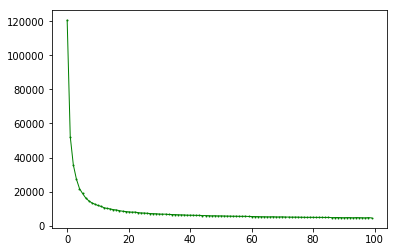

In [40]:
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [61]:
df = pd.DataFrame(new_features, index =y_train)

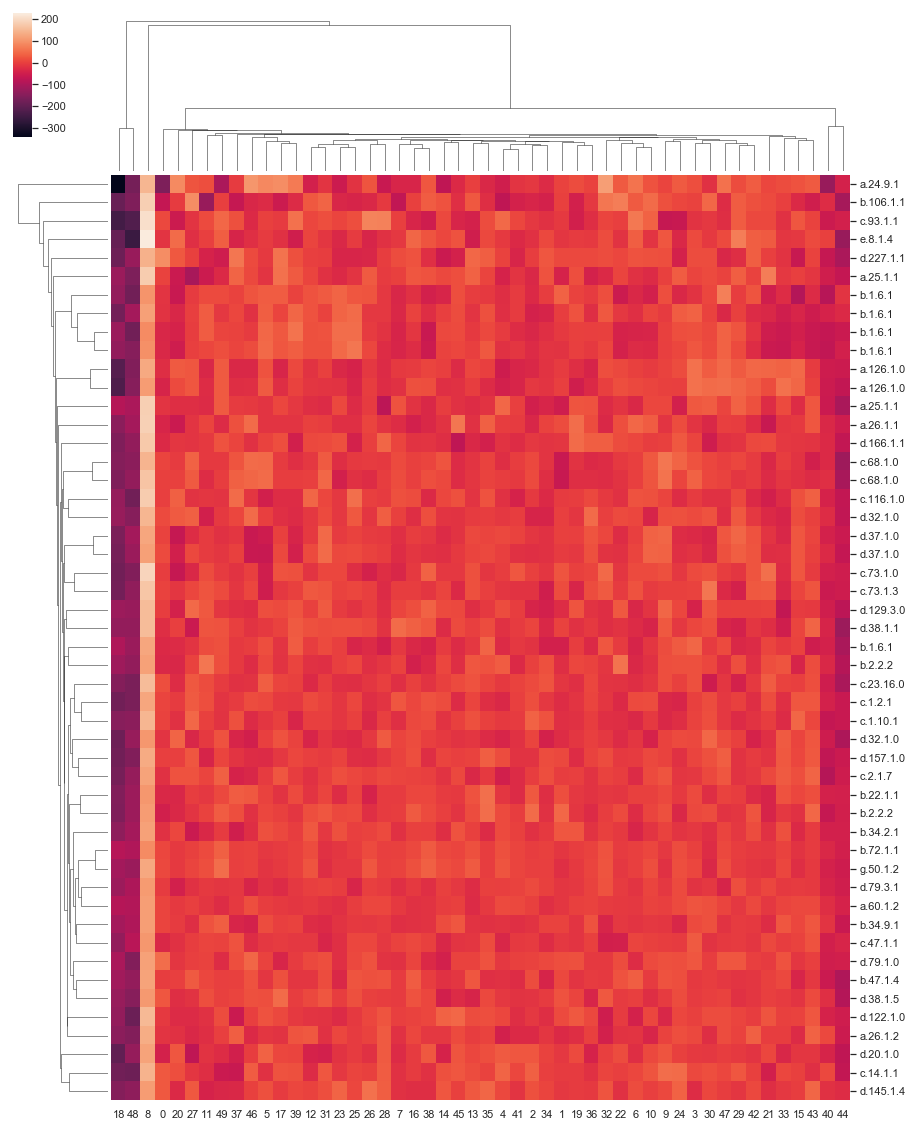

In [65]:
g = sns.clustermap(df[:50], yticklabels=True, figsize=(15, 20))

## HEATMAP WITH 10 FEATURES

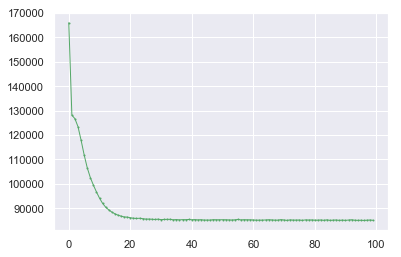

In [67]:
input_size = len(X_train[0])
new_features10d, loss = LinearAutoencoder(X_train, input_size, 10, 100, learning_rate=0.0001)
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

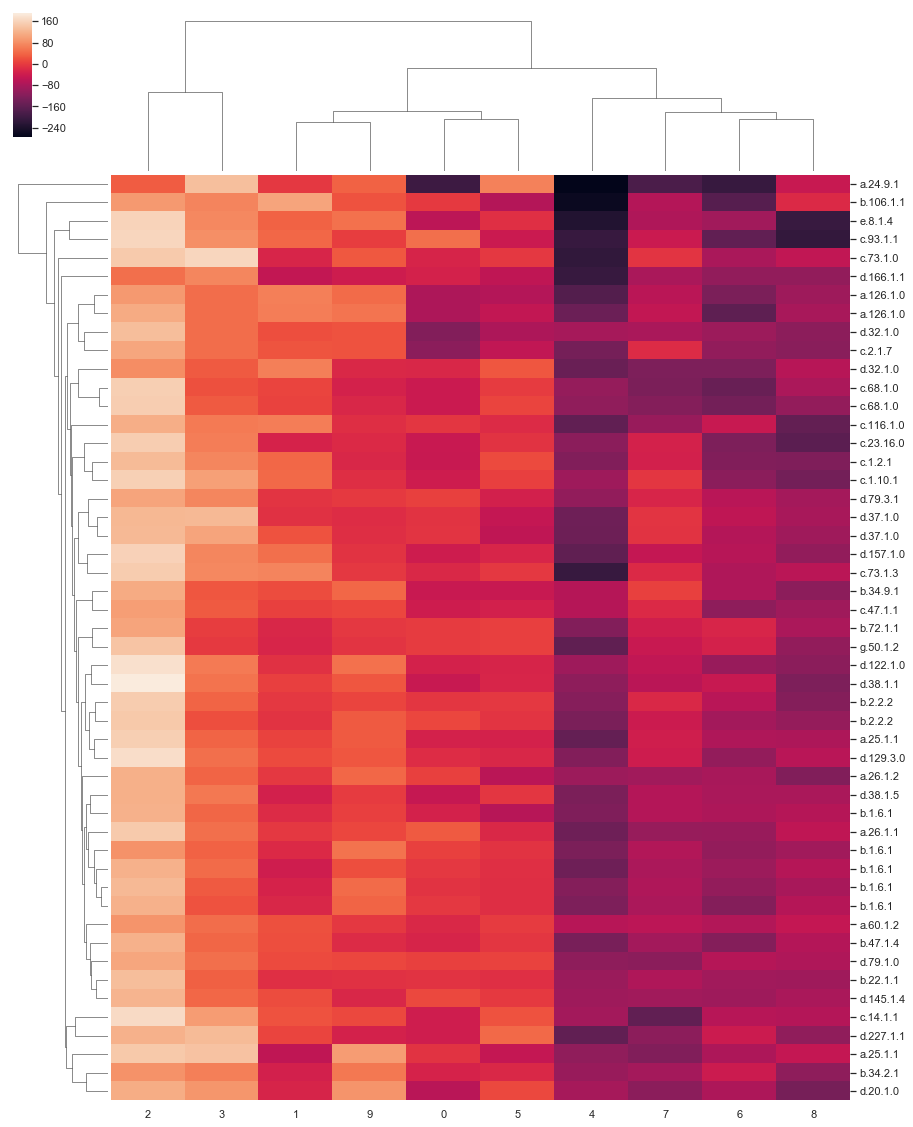

In [69]:
df10d = pd.DataFrame(new_features10d, index =y_train)
g = sns.clustermap(df10d[:50], yticklabels=True, figsize=(15, 20))

## HEATMAP WITH FEATURES OF STRATEGY 2

In [8]:
pdbs_ = proteinmatrixdict.keys()[:50]

In [9]:
structures = []
for pdb in pdbs_:
    pdb_path = os.path.join("PDBs", pdb+".pdb")
    parser = PDB.PDBParser()
    structure = parser.get_structure(pdb, pdb_path)
    structures.append(structure)

In [10]:
proteinmatrixdict_ = DistanceMatrixDict(structures, resize_strategy="strategy2", resize_to=(64,64),sample_size=10)

In [11]:
len(proteinmatrixdict_.keys())

500

In [12]:
X_train_new = proteinmatrixdict_.values()

In [13]:
y_train_new = []
for pdb,matrix in proteinmatrixdict_.items():
    p = pdb.split("sample")[0]
    label = label_dict[p]
    y_train_new.append(label)

In [14]:
len(y_train_new)

500

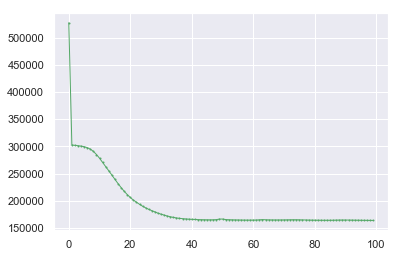

In [15]:
input_size = len(X_train_new[0])
new_features10d, loss = LinearAutoencoder(X_train_new, input_size, 10, 100, learning_rate=0.0001)
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [16]:
df = pd.DataFrame(new_features10d, index =y_train_new)
df.head(2)

,0,1,2,3,4,5,6,7,8,9
d.20.1.0,-141.691116,122.585037,-205.386551,-26.822367,78.226280,225.959656,-157.319641,45.867886,-26.054808,147.982895
d.20.1.0,-131.519012,60.209423,-156.638885,14.451037,140.545593,174.568939,-172.289825,43.659168,-13.493864,126.941437


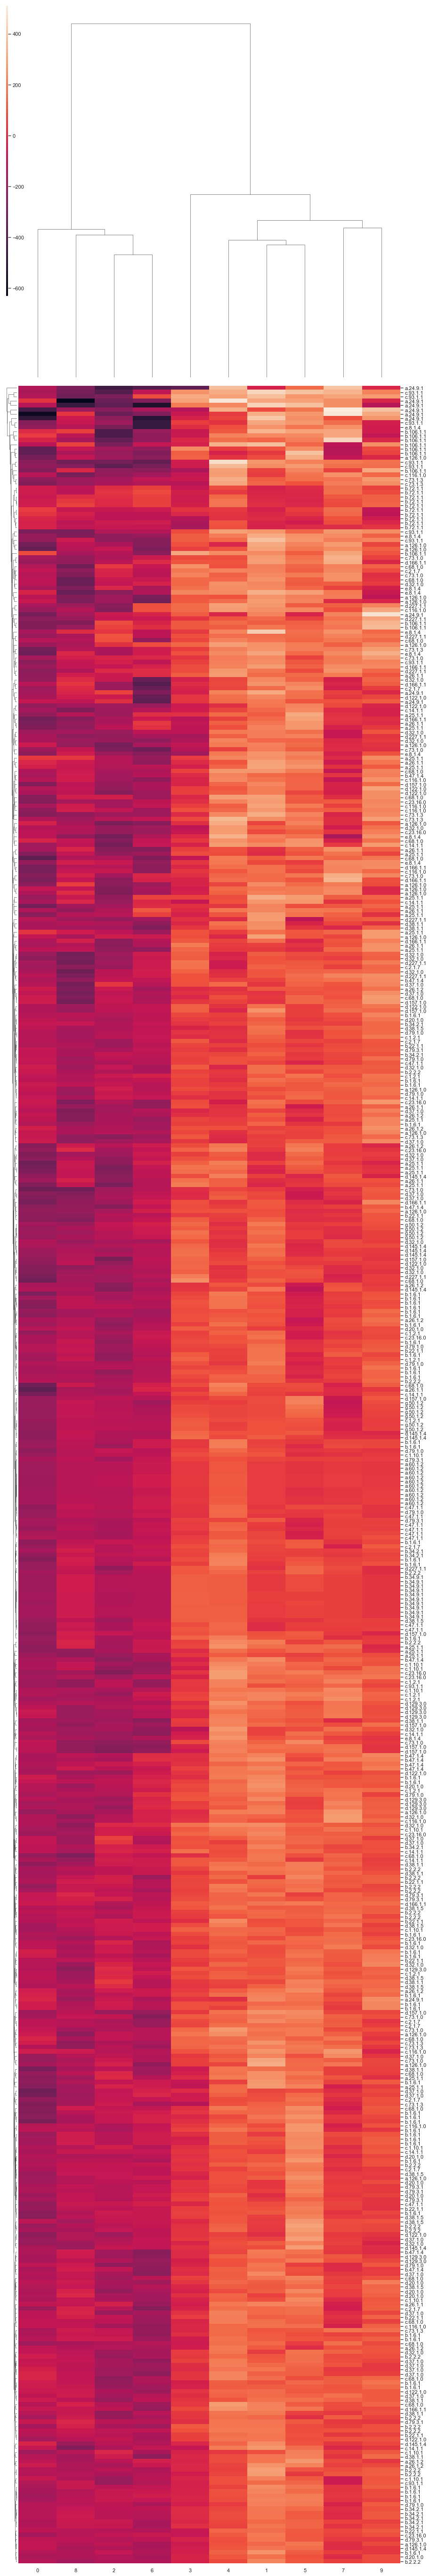

In [18]:
g = sns.clustermap(df, yticklabels=True, figsize=(15, 100))